#### imports

In [1]:
import pandas as pd
import numpy as np
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
#from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
#from scipy.stats import chi2_contingency

# Investigating feature importances

May not be *good* features, depends on how "good" RFs were

In [4]:
rf_top10s = pd.read_csv("/content/rf_top10s.csv")
rf_top10s=rf_top10s.drop("Unnamed: 0",axis="columns")

rf_top10s.head(10)

,col,importance,model
0,MolLogP,0.021379,desc_EC1
1,MinEStateIndex,0.020047,desc_EC1
2,TPSA,0.019955,desc_EC1
3,NumHeteroatoms,0.017357,desc_EC1
4,MinAbsEStateIndex,0.017028,desc_EC1
5,FpDensityMorgan1,0.016624,desc_EC1
6,FpDensityMorgan2,0.016360,desc_EC1
7,VSA_EState9,0.016163,desc_EC1
8,Kappa2,0.016145,desc_EC1
9,qed,0.016089,desc_EC1


In [32]:
top10s=list(rf_top10s["col"].values)
top10s = list(set(top10s))
top10s[:10]

['M338',
 'M487',
 'M506',
 'Kappa3',
 'M382',
 'FpDensityMorgan1',
 'M229',
 'M335',
 'M234',
 'M433']

In [12]:
df = pd.read_csv("/content/enzymes.csv")
df=df.drop("Unnamed: 0",axis="columns")
df.head(10)

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
5,C00024,12.612956,-5.557256,12.612956,0.030983,0.058692,809.578,771.274,809.125774,288,...,0,0,0,1_1_1_0_0_1,1,1,1,0,0,1
6,C00025,9.993880,-1.165509,9.993880,0.023148,0.485976,147.130,138.058,147.053158,58,...,0,0,1,1_1_1_1_1_1,1,1,1,1,1,1
7,C00026,10.184398,-1.582176,10.184398,0.425463,0.521625,146.098,140.050,146.021523,56,...,0,0,0,1_1_0_1_0_1,1,1,0,1,0,1
8,C00027,6.000000,6.000000,6.000000,6.000000,0.292487,34.014,31.998,34.005479,14,...,0,0,0,1_0_0_1_0_0,1,0,0,1,0,0
9,C00029,12.154474,-5.592374,12.154474,0.722789,0.126671,566.302,542.110,566.055021,206,...,0,0,0,1_1_1_1_1_0,1,1,1,1,1,0


In [43]:
l = ["CIDs"]
l.extend(list(set(top10s)))
l.extend(df.columns[-6:])
X = df[l]
X.head(10)

,CIDs,M338,M487,M506,M382,Kappa3,FpDensityMorgan1,M229,M335,M234,...,HeavyAtomMolWt,M493,M129,M293,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,0,1,0,0,1512.242231,1.200000,0,0,0,...,94.970,0,0,0,1,1,1,1,0,1
1,C00013,0,1,0,0,8.260000,0.888889,0,0,0,...,173.941,0,0,0,1,1,1,1,0,1
2,C00014,0,0,0,0,-104.040000,1.000000,0,0,0,...,14.007,0,0,0,1,1,1,1,0,1
3,C00017,0,0,0,1,1.394403,1.777778,0,0,0,...,124.055,0,1,0,0,1,1,0,0,0
4,C00022,0,0,1,1,1.458471,1.500000,0,0,0,...,84.030,0,0,0,1,1,1,1,0,1
5,C00024,1,1,1,1,12.876498,1.078431,0,0,1,...,771.274,0,1,0,1,1,1,0,0,1
6,C00025,0,0,0,1,3.848566,1.400000,0,0,0,...,138.058,0,0,0,1,1,1,1,1,1
7,C00026,0,0,0,1,3.592178,1.000000,0,0,0,...,140.050,0,0,0,1,1,0,1,0,1
8,C00027,0,0,0,0,-14.580000,1.000000,0,0,0,...,31.998,0,0,0,1,0,0,1,0,0
9,C00029,1,1,0,0,6.539616,0.916667,1,0,1,...,542.110,1,0,0,1,1,1,1,1,0


In [44]:
X.describe()

,M338,M487,M506,M382,Kappa3,FpDensityMorgan1,M229,M335,M234,M433,...,HeavyAtomMolWt,M493,M129,M293,EC1,EC2,EC3,EC4,EC5,EC6
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,...,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,0.454283,0.314726,0.138595,0.579403,10.097855,0.605142,0.130895,0.046198,0.460058,0.056785,...,313.867772,0.175168,0.263715,0.044273,0.541867,0.588065,0.295476,0.235804,0.127045,0.126083
std,0.498145,0.464630,0.345690,0.493893,71.412274,20.704697,0.337448,0.210015,0.498642,0.231543,...,264.813450,0.380294,0.440859,0.205801,0.498484,0.492420,0.456476,0.424704,0.333184,0.332102
min,0.000000,0.000000,0.000000,0.000000,-104.040000,-666.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.918210,1.000000,0.000000,0.000000,0.000000,0.000000,...,140.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,3.624803,1.200000,0.000000,0.000000,0.000000,0.000000,...,215.033000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,7.228611,1.486842,0.000000,0.000000,1.000000,0.000000,...,399.691500,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1512.242231,3.000000,1.000000,1.000000,1.000000,1.000000,...,2035.133000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


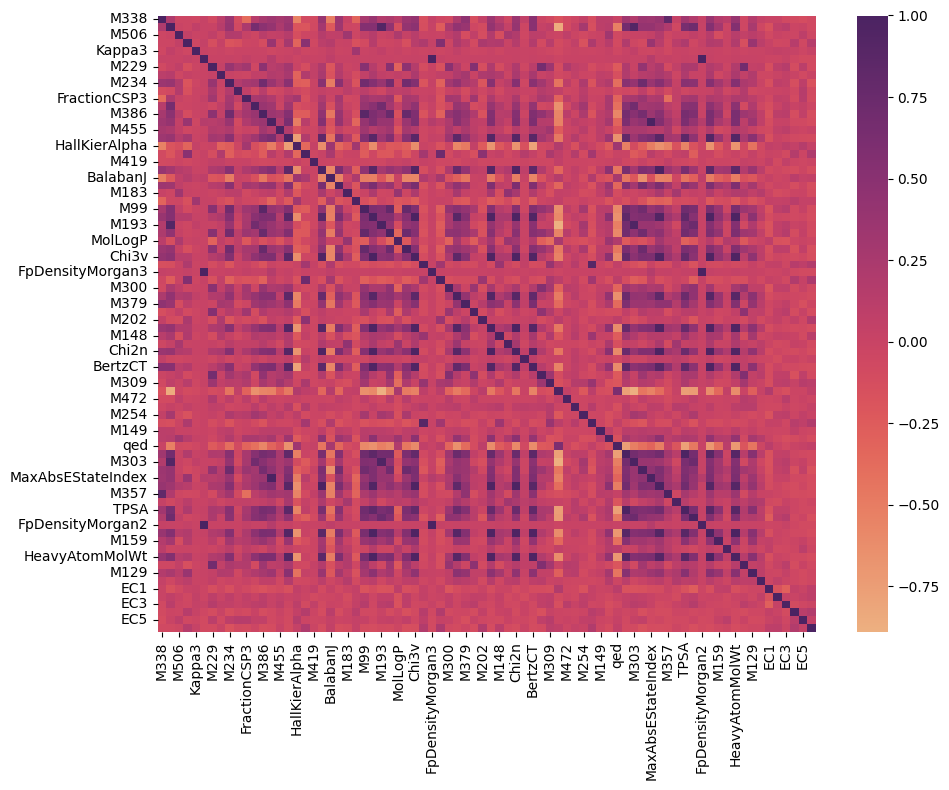

In [46]:
corr=X[X.columns[1:]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="flare")
plt.tight_layout()
plt.show()

Some multicollinearity

Targets are in binary so pearson coefficient is not suitable to test correlation

# Decision Tree

## metrics

In [48]:
metrics_df = pd.read_csv("/content/metrics_baselineDTs.csv")
metrics_df=metrics_df.drop("Unnamed: 0",axis="columns")
metrics_df

,metric,DT_EC1,DT_EC2,DT_EC3,DT_EC4,DT_EC5,DT_EC6,DT_multiclass
0,accuracy,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192
1,precision,0.624628,0.580485,0.690873,0.676764,0.834746,0.796352,0.133704
2,recall,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192
3,f1,0.624583,0.578052,0.674392,0.674862,0.833219,0.794795,0.123150


## Train/test & modelling

In [49]:
for y_col in X.columns[-6:]: #loop over ECs
    print(y_col)

    #redefine train/test
    y = X[y_col]
    x_train, x_test, y_train, y_test = train_test_split(X[X.columns[1:-6]],
                                                        y, test_size=0.2,
                                                        random_state=1120)

    print("Target Class Imbalance:")
    print(y_train.value_counts()/y_train.shape[0],"\n\n")

    #Modelling
    dt_baseline = DecisionTreeClassifier(max_depth=10) #some hyperparameter tuning
    dt_baseline.fit(x_train,y_train)
    y_pred = dt_baseline.predict(x_test)

    metrics_df[f"DTselect_{y_col}"] = [ #append dataframe
                accuracy_score(y_test, y_pred), #'accuracy'
    #"weighted" argument parameter is artifact from multiclass classifications and can be removed
                precision_score(y_test, y_pred,average="weighted"), #'precision'
                recall_score(y_test, y_pred,average="weighted"), #'recall'
                f1_score(y_test, y_pred,average="weighted") #'f1_score'
    ]

    print(f"{y_col} Train accuracy:", dt_baseline.score(x_train, y_train))
    print(f"{y_col} Test accuracy:", dt_baseline.score(x_test, y_test))
    print("\n\n")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------------------\n\n\n")


metrics_df

EC1
Target Class Imbalance:
EC1
1    0.533093
0    0.466907
Name: count, dtype: float64 


EC1 Train accuracy: 0.8856799037304453
EC1 Test accuracy: 0.6538461538461539



              precision    recall  f1-score   support

           0       0.59      0.58      0.59        88
           1       0.70      0.71      0.70       120

    accuracy                           0.65       208
   macro avg       0.64      0.64      0.64       208
weighted avg       0.65      0.65      0.65       208

-------------------------------------------------------------------



EC2
Target Class Imbalance:
EC2
1    0.596871
0    0.403129
Name: count, dtype: float64 


EC2 Train accuracy: 0.9133574007220217
EC2 Test accuracy: 0.5144230769230769



              precision    recall  f1-score   support

           0       0.45      0.40      0.42        93
           1       0.56      0.61      0.58       115

    accuracy                           0.51       208
   macro avg       0.50      0.50      0.5

,metric,DT_EC1,DT_EC2,DT_EC3,DT_EC4,DT_EC5,DT_EC6,DT_multiclass,DTselect_EC1,DTselect_EC2,DTselect_EC3,DTselect_EC4,DTselect_EC5,DTselect_EC6
0,accuracy,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192,0.653846,0.514423,0.677885,0.730769,0.836538,0.822115
1,precision,0.624628,0.580485,0.690873,0.676764,0.834746,0.796352,0.133704,0.652849,0.508905,0.656771,0.704134,0.820393,0.824782
2,recall,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192,0.653846,0.514423,0.677885,0.730769,0.836538,0.822115
3,f1,0.624583,0.578052,0.674392,0.674862,0.833219,0.794795,0.123150,0.653287,0.510244,0.662691,0.712860,0.827655,0.823428


Slightly better performance on most, worse on `EC2`

In [64]:
metrics_df.to_csv("DT_metrics.csv")

In [51]:
og_DTs = "DT_EC1	DT_EC2	DT_EC3	DT_EC4	DT_EC5	DT_EC6".split()
select_DTs = "DTselect_EC1	DTselect_EC2	DTselect_EC3	DTselect_EC4	DTselect_EC5	DTselect_EC6".split()

In [62]:
pd.DataFrame(metrics_df.T).loc[list(og_DTs)]

,0,1,2,3
DT_EC1,0.625,0.624628,0.625,0.624583
DT_EC2,0.581731,0.580485,0.581731,0.578052
DT_EC3,0.663462,0.690873,0.663462,0.674392
DT_EC4,0.673077,0.676764,0.673077,0.674862
DT_EC5,0.831731,0.834746,0.831731,0.833219
DT_EC6,0.793269,0.796352,0.793269,0.794795


# Gemini - Task
Create a series of bar graphs to compare the performance metrics (accuracy, precision, recall, f1-score) of the 'Original Decision Tree' models and 'Selected Features Decision Tree' models across different EC numbers. Each graph should display one metric, comparing the two model types for all available EC numbers.

## Prepare Data for Plotting

### Subtask:
Filter the metrics DataFrame to include only the metrics for the original and selected Decision Tree models across all EC numbers. Rename columns for clarity.


**Reasoning**:
The subtask requires filtering and renaming columns in the `metrics_df` DataFrame to prepare it for plotting. I will create a list of columns to keep, filter the DataFrame, and then rename the columns according to the instructions.



In [52]:
columns_to_keep = ['metric'] + og_DTs + select_DTs
plot_df = metrics_df[columns_to_keep].copy()

# Rename original DT columns
original_dt_rename_map = {col: col.replace('DT_', '') for col in og_DTs}
plot_df.rename(columns=original_dt_rename_map, inplace=True)

# Rename selected DT columns
selected_dt_rename_map = {col: col.replace('DTselect_', '') + '_select' for col in select_DTs}
plot_df.rename(columns=selected_dt_rename_map, inplace=True)

plot_df.head()

,metric,EC1,EC2,EC3,EC4,EC5,EC6,EC1_select,EC2_select,EC3_select,EC4_select,EC5_select,EC6_select
0,accuracy,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.653846,0.514423,0.677885,0.730769,0.836538,0.822115
1,precision,0.624628,0.580485,0.690873,0.676764,0.834746,0.796352,0.652849,0.508905,0.656771,0.704134,0.820393,0.824782
2,recall,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.653846,0.514423,0.677885,0.730769,0.836538,0.822115
3,f1,0.624583,0.578052,0.674392,0.674862,0.833219,0.794795,0.653287,0.510244,0.662691,0.712860,0.827655,0.823428


## Reshape Data

### Subtask:
Melt the filtered DataFrame into a long format, suitable for plotting multiple categories on a single graph. This will create columns for 'metric', 'model_type_ec', and 'value'.


**Reasoning**:
To prepare the data for plotting, I will melt the `plot_df` DataFrame into a long format using `pd.melt()` as instructed, which will create a new DataFrame with 'metric', 'model_type_ec', and 'value' columns. Then, I will display the head of the new DataFrame to verify the transformation.



In [54]:
plot_df_melted = pd.melt(plot_df, id_vars=['metric'], var_name='model_type_ec', value_name='value')
plot_df_melted.head()

,metric,model_type_ec,value
0,accuracy,EC1,0.625000
1,precision,EC1,0.624628
2,recall,EC1,0.625000
3,f1,EC1,0.624583
4,accuracy,EC2,0.581731


**Reasoning**:
Now that the DataFrame is in a long format, I need to extract the EC number and model type from the `model_type_ec` column to prepare for plotting. I will create new columns for 'EC_number' and 'model_type' using string splitting, and then display the head of the modified DataFrame to verify the transformation.



In [55]:
plot_df_melted[['EC_number', 'model_type']] = plot_df_melted['model_type_ec'].str.split('_', expand=True)
plot_df_melted['model_type'] = plot_df_melted['model_type'].replace(np.nan, 'original')
plot_df_melted.head()

,metric,model_type_ec,value,EC_number,model_type
0,accuracy,EC1,0.625000,EC1,original
1,precision,EC1,0.624628,EC1,original
2,recall,EC1,0.625000,EC1,original
3,f1,EC1,0.624583,EC1,original
4,accuracy,EC2,0.581731,EC2,original


**Reasoning**:
I need to visualize the performance metrics (accuracy, precision, recall, f1-score) for both original and selected feature Decision Tree models across different EC numbers. Using `seaborn.catplot` with `col='metric'` will allow me to create separate bar graphs for each metric, while `x='EC_number'`, `y='value'`, and `hue='model_type'` will compare the models for each EC number.



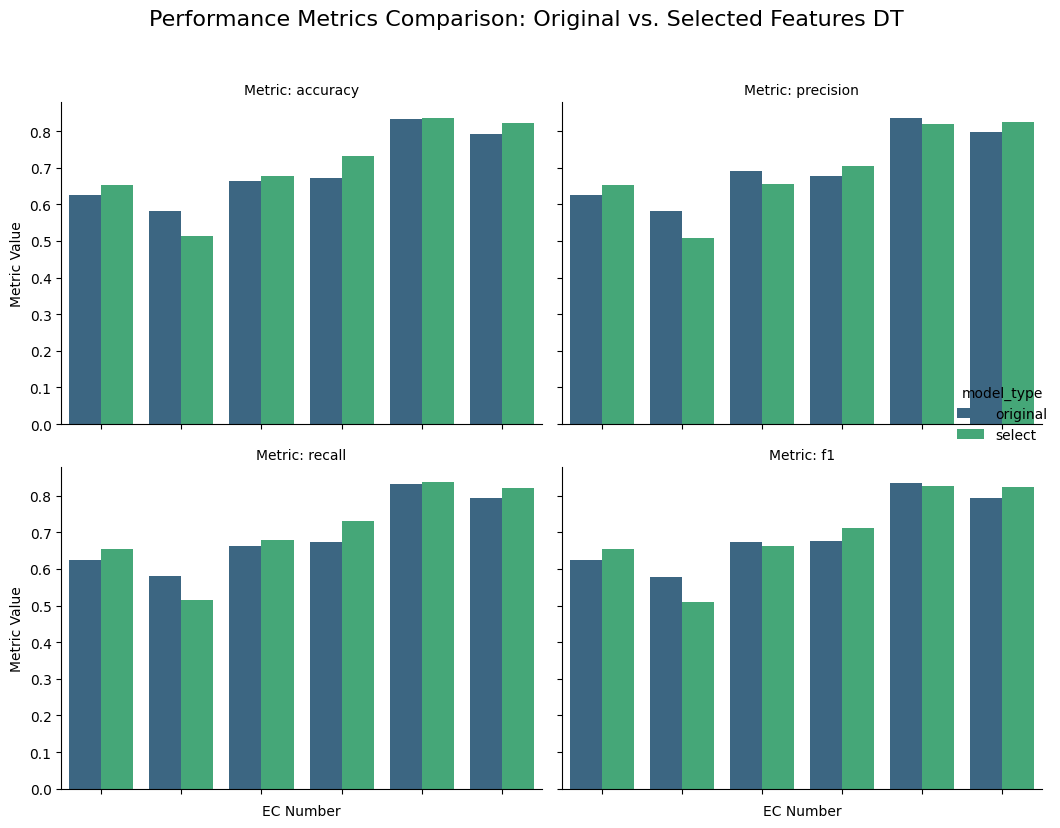

In [58]:
g = sns.catplot(data=plot_df_melted, x='EC_number', y='value', hue='model_type', col='metric', col_wrap=2, kind='bar', height=4, aspect=1.2, palette='viridis')
g.set_axis_labels("EC Number", "Metric Value")
g.set_titles("Metric: {col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Performance Metrics Comparison: Original vs. Selected Features DT', y=1.03, fontsize=16)
plt.tight_layout()
plt.show()

Accuracy <--> weighted recall (equivalent)

# UMAP

## Full Dataset

In [44]:
df = pd.read_csv("/content/enzymes.csv").drop("Unnamed: 0",axis="columns")
df

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,C22158,4.750000,0.250000,4.750000,0.250000,0.371490,16.023,14.007,16.018724,7,...,0,0,0,0_1_0_0_0_1,0,1,0,0,0,1
1035,C22169,13.516859,-0.727746,13.516859,0.138810,0.536654,405.458,382.274,405.180090,154,...,0,0,0,0_1_0_0_0_0,0,1,0,0,0,0
1036,C22180,13.606147,-2.044178,13.606147,0.276604,0.060282,831.693,794.397,831.197041,316,...,0,0,0,0_1_0_0_0_0,0,1,0,0,0,0
1037,C22181,13.774221,-2.149645,13.774221,0.322613,0.051119,993.834,946.458,993.249864,380,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0


In [45]:
df = df.drop("Ipc",axis="columns")

In [46]:
label_cols=list(df.columns[-6:])

In [47]:
y = df[label_cols]

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


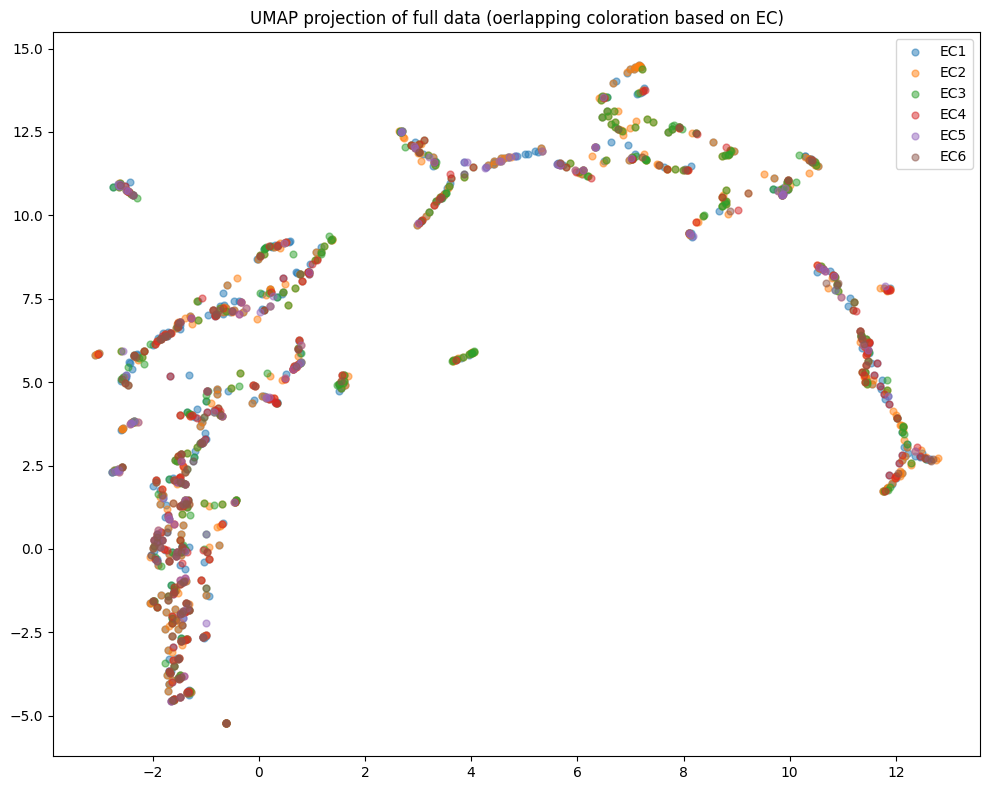

plot#2




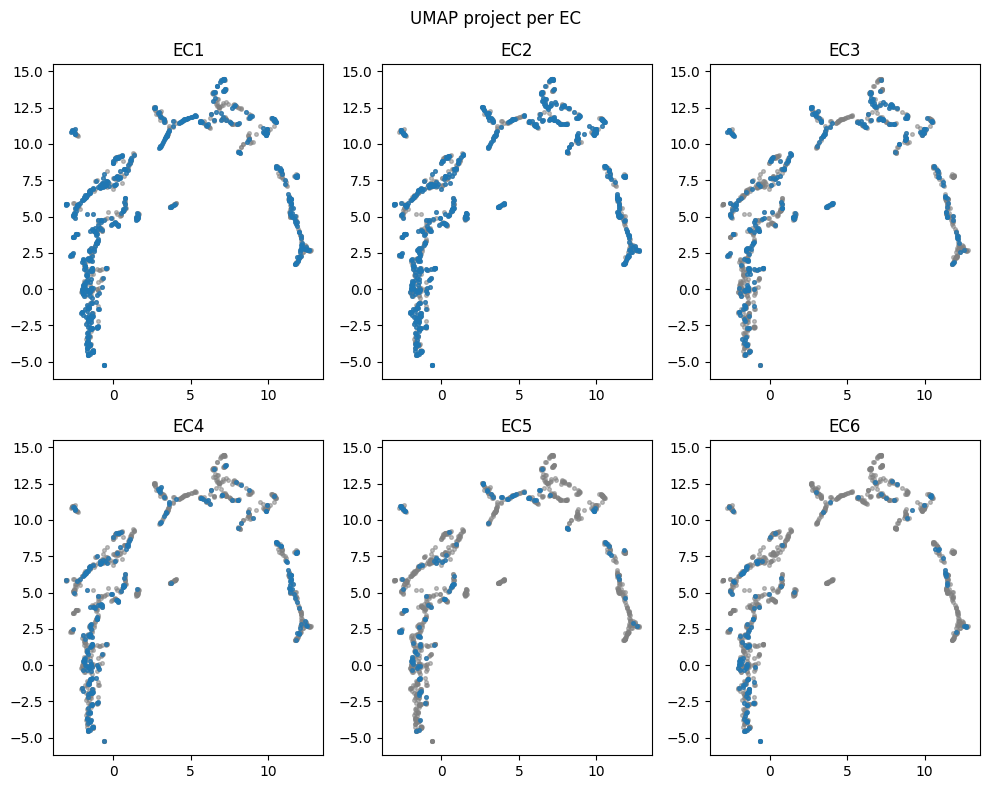

In [48]:
import umap

# df should contain only feature columns (no labels)
reducer = umap.UMAP(random_state=1120)

embedding = reducer.fit_transform(df[df.columns[1:-7]])

plt.figure(figsize=(10,8))

for col in label_cols:
    idx = y[col] == 1
    plt.scatter(embedding[idx,0], embedding[idx,1], s=24, alpha=0.5, label=col)

plt.legend()
plt.title("UMAP projection of full data (oerlapping coloration based on EC)")
plt.tight_layout()
plt.show()

print("plot#2\n\n")
fig, axes = plt.subplots(2, 3, figsize=(10,8))

for ax, col in zip(axes.ravel(), label_cols):
    idx = y[col] == 1
    ax.scatter(embedding[:,0], embedding[:,1], s=7, alpha=0.5, color="grey")
    ax.scatter(embedding[idx,0], embedding[idx,1], s=7,alpha=0.7)
    ax.set_title(col)
plt.suptitle("UMAP project per EC")
plt.tight_layout()
plt.show()

## Feature selected

In [49]:
rf_top10s = pd.read_csv("/content/rf_top10s.csv")
rf_top10s=rf_top10s.drop("Unnamed: 0",axis="columns")

rf_top10s.head(10)

,col,importance,model
0,MolLogP,0.021379,desc_EC1
1,MinEStateIndex,0.020047,desc_EC1
2,TPSA,0.019955,desc_EC1
3,NumHeteroatoms,0.017357,desc_EC1
4,MinAbsEStateIndex,0.017028,desc_EC1
5,FpDensityMorgan1,0.016624,desc_EC1
6,FpDensityMorgan2,0.016360,desc_EC1
7,VSA_EState9,0.016163,desc_EC1
8,Kappa2,0.016145,desc_EC1
9,qed,0.016089,desc_EC1


In [50]:
top10s=list(rf_top10s["col"].values)
top10s = list(set(top10s))
top10s.insert(0,"CIDs")
top10s.extend(y)
top10s[:10],"\n",top10s[-10:]

(['CIDs',
  'FpDensityMorgan3',
  'M99',
  'M493',
  'Chi2n',
  'M379',
  'M254',
  'M508',
  'M293',
  'M284'],
 '\n',
 ['M404',
  'HallKierAlpha',
  'BertzCT',
  'VSA_EState9',
  'EC1',
  'EC2',
  'EC3',
  'EC4',
  'EC5',
  'EC6'])

In [51]:
small_df = df[top10s]
small_df

,CIDs,FpDensityMorgan3,M99,M493,Chi2n,M379,M254,M508,M293,M284,...,M404,HallKierAlpha,BertzCT,VSA_EState9,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,1.200000,0,0,0.513277,0,0,0,0,0,...,0,0.11,49.783540,16.923611,1,1,1,1,0,1
1,C00013,1.111111,0,0,1.062804,0,0,0,0,1,...,0,0.26,147.355172,20.899028,1,1,1,1,0,1
2,C00014,1.000000,0,0,0.000000,0,0,0,0,0,...,0,-0.04,0.000000,0.000000,1,1,1,1,0,1
3,C00017,2.666667,0,0,1.157830,0,0,0,0,0,...,0,-1.10,172.720106,35.105740,0,1,1,0,0,0
4,C00022,1.666667,0,0,0.861339,0,0,0,0,0,...,0,-0.86,72.039100,25.333333,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,C22158,3.000000,0,0,0.000000,0,0,0,0,0,...,0,-0.04,2.000000,4.750000,0,1,0,0,0,1
1035,C22169,2.800000,0,0,8.606229,1,0,1,0,1,...,0,-3.39,1089.952436,71.666667,0,1,0,0,0,0
1036,C22180,1.389831,1,1,13.000558,0,0,1,0,0,...,0,-6.92,2063.210735,182.833333,0,1,0,0,0,0
1037,C22181,1.171429,1,1,16.012936,0,0,1,0,0,...,0,-7.12,2381.323662,218.166667,0,1,1,0,0,0


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


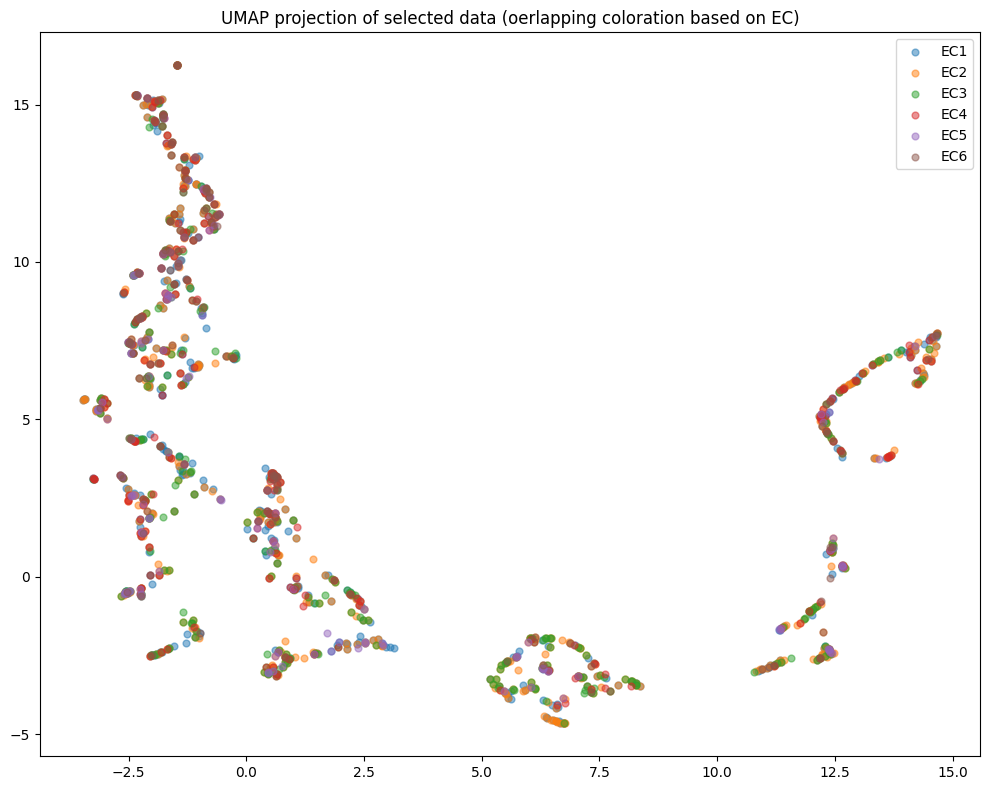

plot#2




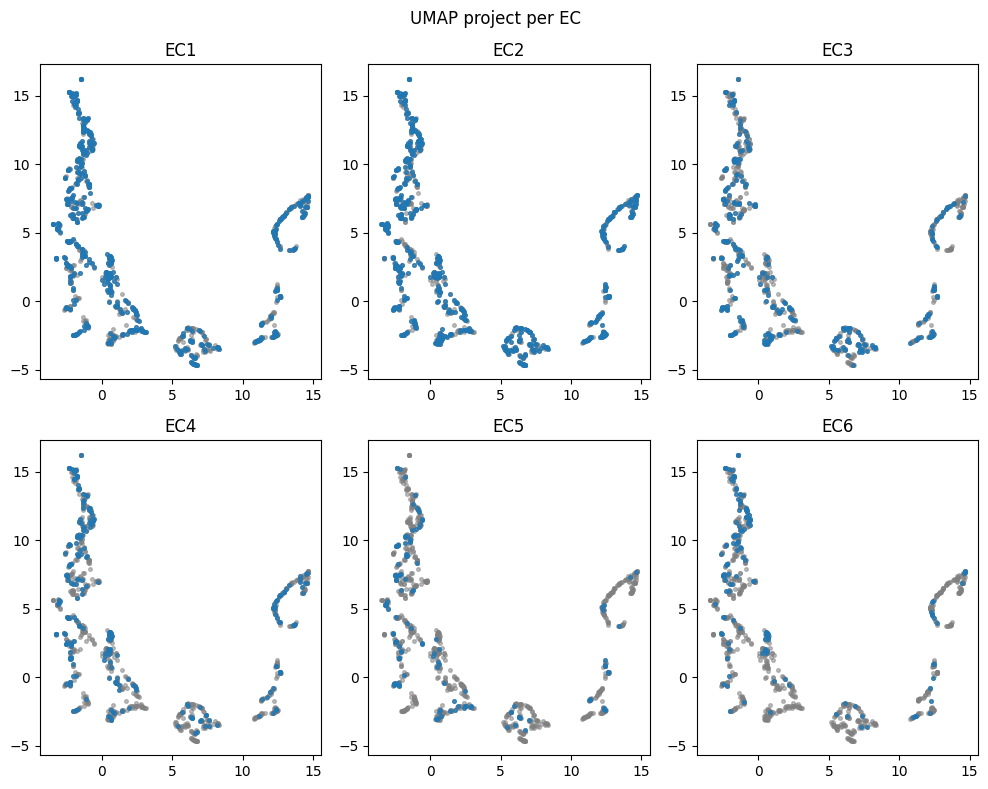

In [52]:
import umap

# df should contain only feature columns (no labels)
reducer = umap.UMAP(random_state=1120)

embedding = reducer.fit_transform(small_df[small_df.columns[1:-6]])

plt.figure(figsize=(10,8))

for col in label_cols:
    idx = small_df[col] == 1
    plt.scatter(embedding[idx,0], embedding[idx,1], s=24, alpha=0.5, label=col)

plt.legend()
plt.title("UMAP projection of selected data (oerlapping coloration based on EC)")
plt.tight_layout()
plt.show()

print("plot#2\n\n")
fig, axes = plt.subplots(2, 3, figsize=(10,8))

for ax, col in zip(axes.ravel(), label_cols):
    idx = small_df[col] == 1
    ax.scatter(embedding[:,0], embedding[:,1], s=7, alpha=0.5, color="grey")
    ax.scatter(embedding[idx,0], embedding[idx,1], s=7,alpha=0.7)
    ax.set_title(col)
plt.suptitle("UMAP project per EC")
plt.tight_layout()
plt.show()

Similar shape (rotational alignment is irrelevant) supports the notion that the selected features are a good representation of larger dataset